# Rainfall Prediction Analysis 🌧
# --------------------------------------------------------------------------------
Hey there! I'm Tarini Pathak, currently studying B.Tech CSE at Bennett University.
Coming from Jabalpur, MP, where unpredictable monsoons often disrupt daily life, 
I have personally seen how rainfall affects agriculture, transportation, and city life.
Now, living in Greater Noida, the contrast is clear—here, rains are less frequent, 
but the urban infrastructure faces massive waterlogging issues whenever it pours.

This project is my attempt to better understand rainfall patterns by analyzing 
an Australian dataset, applying data science techniques, and sharpening my 
machine learning skills. Let’s get started! 

# Step1: Initial Data Exploration: 

### Step1: Importing the libraries

In [7]:
import pandas as pd
import numpy as np

### Step2: Loading the dataset

In [10]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Step 3: Initial Inspection of Data

#### Let's take a quick look at the dataset's structure.

In [13]:
print("Shape of the dataset:", df.shape) 
print('')

print("Basic informationf of the dataset: ")
print(df.info())
print('')


print("Statistical info: ")
print(df.describe())
print('')


print("All the columns: ", df.columns)
print('')

Shape of the dataset: (142193, 24)

Basic informationf of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pr

## Converting Rain Labels to Numeric Format 
# ------------------------------------------------------------------------------
Why this step?
In our dataset, "RainToday" and "RainTomorrow" are categorical variables 
("Yes" or "No"). Machine learning models work better with numerical data, 
so we convert:
- "No" → 0 (No rainfall)
- "Yes" → 1 (Rainfall occurred)

### Real-world connection:
In Jabalpur, the question "Did it rain today?" is crucial for farmers, travelers, 
and city dwellers alike. Similarly, in Noida, knowing if it rained today 
helps predict if roads will be waterlogged tomorrow. 
This conversion helps AI make better rainfall predictions!

In [16]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

/var/folders/2f/9spd7dvj6s31wypb9395bzh80000gn/T/ipykernel_79240/3889771497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
/var/folders/2f/9spd7dvj6s31wypb9395bzh80000gn/T/ipykernel_79240/3889771497.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

# Step2: Data Visualization: Understanding Rainfall Distribution 


### Step 1: Importing Visualization Libraries

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

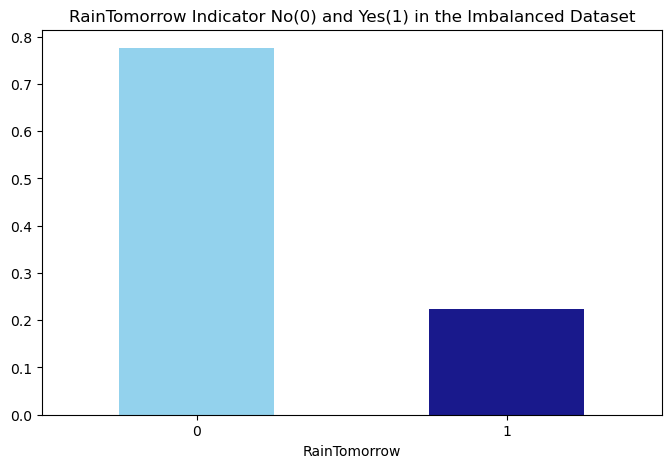

In [24]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

# Step3: Dealing with Data Imbalance

If we train our model on this raw data, it will be biased towards predicting 'No Rain' 
because those examples dominate. This is like preparing for an exam where 90% of the syllabus 
is from one subject—your preparation won’t be well-rounded.

The solution? Oversampling! We generate more 'Yes Rain' samples by resampling existing ones 
to create a balanced dataset.

### Step1: Importing needed library

In [30]:
from sklearn.utils import resample

### Step2: Separating Majority (No Rain) and Minority (Yes Rain) Classes

In [40]:
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]

### Step 3: Oversampling - Creating Synthetic Samples for 'Yes Rain' Class
We randomly resample the 'Yes Rain' class to match the number of 'No Rain' samples.


In [43]:
yes_oversampled = resample(yes, 
                           replace=True,  
                           n_samples=len(no),  
                           random_state=123)  


### Step 4: Merging the Balanced Dataset


In [46]:
oversampled = pd.concat([no, yes_oversampled])  


### Step 4: Visualizing the New Class Distribution

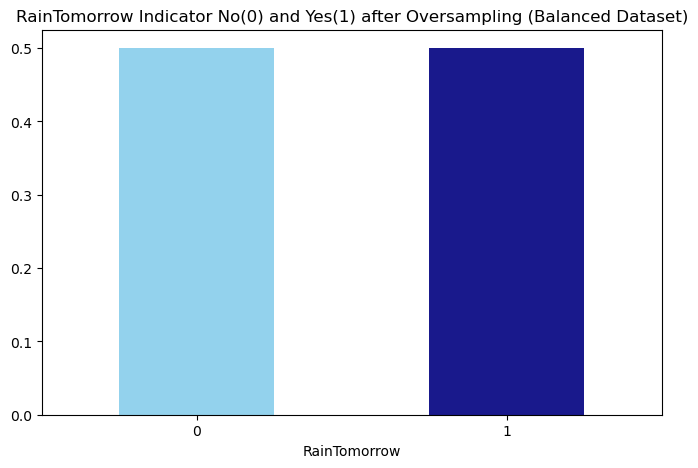

In [51]:
fig = plt.figure(figsize=(8,5))
oversampled.RainTomorrow.value_counts(normalize=True).plot(kind='bar', 
                                                            color=['skyblue', 'navy'], 
                                                            alpha=0.9, 
                                                            rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()